# Question 1

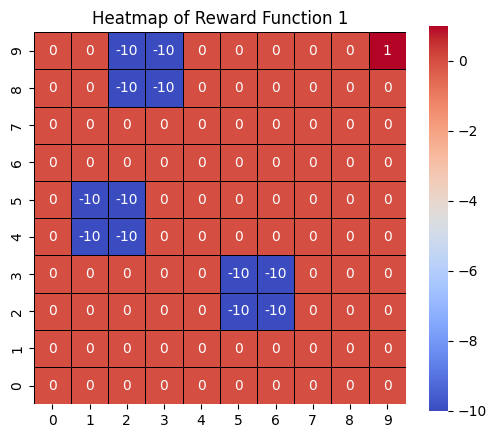

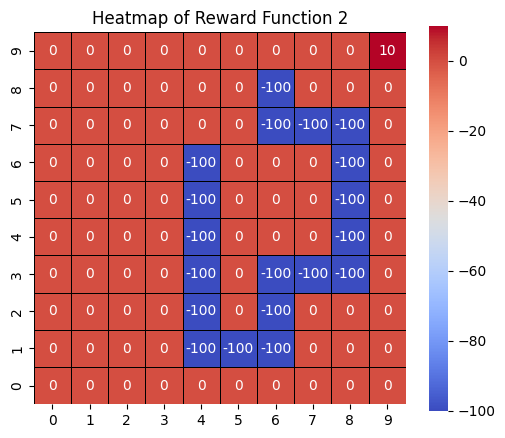

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Reward Function 1 (from Figure 6)
reward1 = np.zeros((10, 10))
reward1[2, 5] = -10
reward1[2, 6] = -10
reward1[3, 5] = -10
reward1[3, 6] = -10
reward1[4, 1] = -10
reward1[4, 2] = -10
reward1[5, 1] = -10
reward1[5, 2] = -10
reward1[8, 2] = -10
reward1[8, 3] = -10
reward1[9, 2] = -10
reward1[9, 3] = -10
reward1[9, 9] = 1

# Reward Function 2 (from Figure 7)
reward2 = np.zeros((10, 10))
coords2 = [
    (1, 4), (1, 5), (1, 6), (2, 4), (2, 6), (3, 4), (3, 6), (3, 7), (3, 8), (4, 4), (4, 8), (5, 4), (5, 8), (6, 4), (6, 8), (7, 6), (7, 7), (7, 8), (8, 6)
    ]
for r, c in coords2:
    reward2[r, c] = -100
reward2[9, 9] = 10

# Plotting function
def plot_heatmap(data, title):
    plt.figure(figsize=(6, 5))
    ax = sns.heatmap(data, annot=True, cmap='coolwarm', square=True, cbar=True,
                     linewidths=0.5, linecolor='black', fmt=".0f")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Generate the heatmaps
plot_heatmap(reward1, "Heatmap of Reward Function 1")
plot_heatmap(reward2, "Heatmap of Reward Function 2")


# Question 2

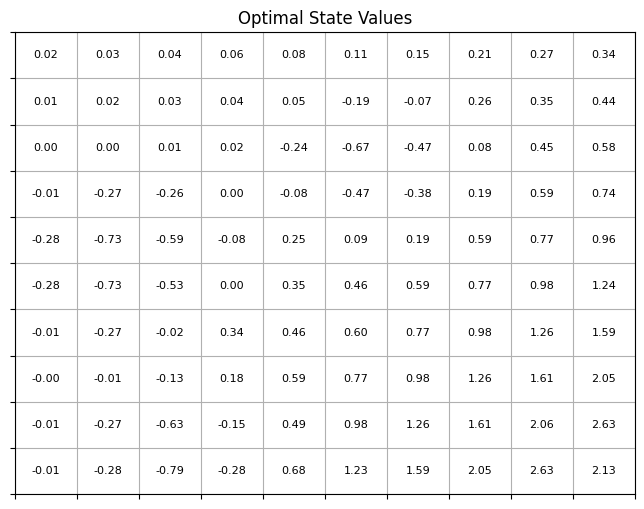

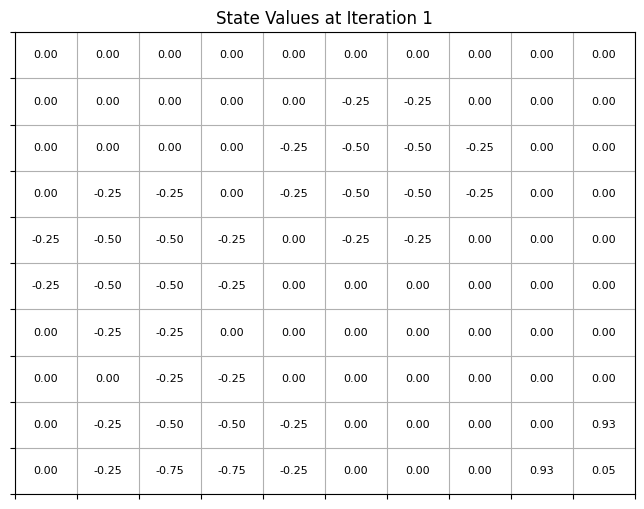

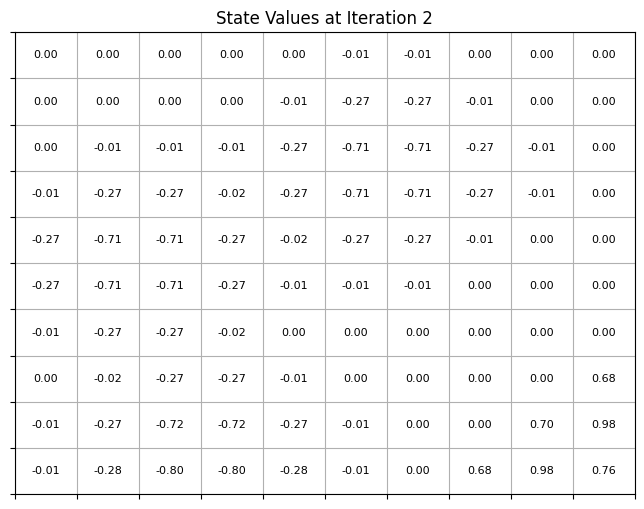

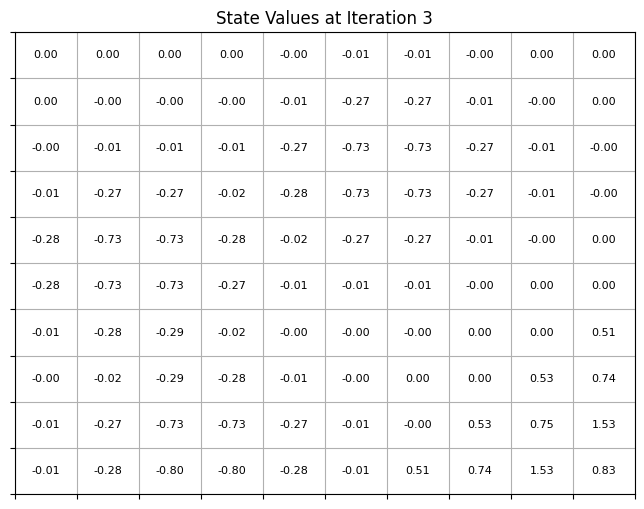

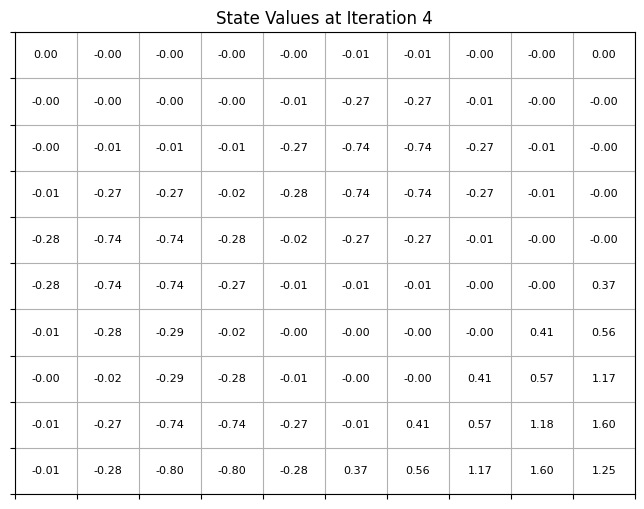

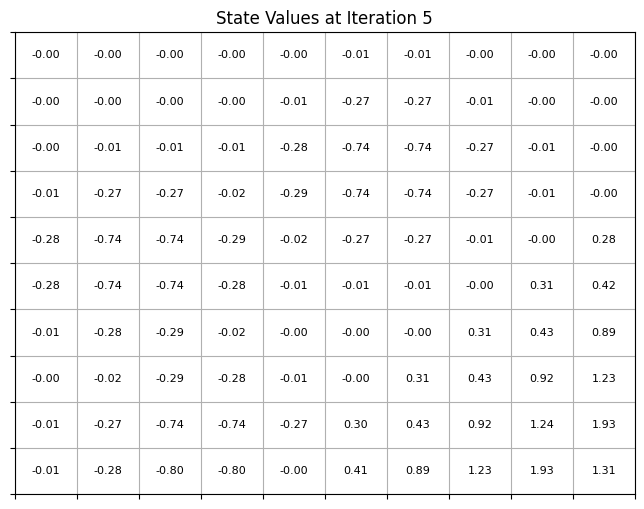

Number of iterations (N): 21
Snapshot iterations: [1, 2, 3, 4, 5]
Observations: To be updated after verifying the plots.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# MDP Parameters
num_states = 100
grid_size = 10
num_actions = 4
w = 0.1
gamma = 0.8
epsilon = 0.01

# Actions: 0=Right, 1=Left, 2=Up, 3=Down
actions = [0, 1, 2, 3]

# Reward Function 1 (from figure)
reward_function = np.zeros(num_states)
reward_function[[25, 26, 35, 36, 41, 42, 51, 52, 82, 83, 92, 93]] = -10
reward_function[99] = 1

# Transition Probabilities: P[s, s', a]
P = np.zeros((num_states, num_states, num_actions))

def get_neighbors(state):
    row, col = divmod(state, grid_size)
    neighbors = []
    if col < grid_size - 1:  # Right
        neighbors.append(state + 1)
    if col > 0:  # Left
        neighbors.append(state - 1)
    if row > 0:  # Up
        neighbors.append(state - grid_size)
    if row < grid_size - 1:  # Down
        neighbors.append(state + grid_size)
    return neighbors

def compute_transition_probabilities():
    for s in range(num_states):
        row, col = divmod(s, grid_size)
        neighbors = get_neighbors(s)
        for a in actions:
            intended_state = s
            if a == 0 and col < grid_size - 1:
                intended_state = s + 1
            elif a == 1 and col > 0:
                intended_state = s - 1
            elif a == 2 and row > 0:
                intended_state = s - grid_size
            elif a == 3 and row < grid_size - 1:
                intended_state = s + grid_size

            for move, offset in zip(actions, [(0, 1), (0, -1), (-1, 0), (1, 0)]):
                nx, ny = row + offset[0], col + offset[1]
                if 0 <= nx < grid_size and 0 <= ny < grid_size:
                    sp = nx * grid_size + ny
                    P[s, sp, a] += w / 4
                else:
                    P[s, s, a] += w / 4  # wind blows off-grid → stay

            if intended_state == s:
                P[s, s, a] += (1 - w)
            else:
                P[s, intended_state, a] += (1 - w)

# Compute P
compute_transition_probabilities()

# Value Iteration
def value_iteration():
    V = np.zeros(num_states)
    delta = float('inf')
    iteration = 0
    snapshots = []
    snapshot_iterations = [1, 2, 3, 4, 5]

    while delta > epsilon and iteration < 1000:
        delta = 0
        V_new = np.zeros(num_states)
        for s in range(num_states):
            q_values = []
            for a in actions:
                q = np.sum(P[s, :, a] * (reward_function + gamma * V))
                q_values.append(q)
            V_new[s] = max(q_values)
            delta = max(delta, abs(V[s] - V_new[s]))

        V = V_new
        iteration += 1
        if iteration in snapshot_iterations:
            snapshots.append(V.copy())

    return V, iteration, snapshots, snapshot_iterations

# Run
optimal_V, N, snapshots, snapshot_steps = value_iteration()

# Plotting Functions
def plot_state_values(V, title):
    V_grid = V.reshape(grid_size, grid_size)
    fig, ax = plt.subplots(figsize=(8, 6))
    for i in range(grid_size):
        for j in range(grid_size):
            ax.text(j + 0.5, grid_size - 1 - i + 0.5, f'{V_grid[i, j]:.2f}',
                    ha='center', va='center', fontsize=8)
    ax.set_xticks(np.arange(grid_size + 1))
    ax.set_yticks(np.arange(grid_size + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    plt.title(title)
    plt.show()

def plot_heatmap(V, title):
    V_grid = V.reshape(grid_size, grid_size)
    plt.figure(figsize=(6, 5))
    plt.imshow(V_grid, cmap='viridis', origin='lower')
    plt.colorbar(label='Value')
    plt.title(title)
    plt.show()

# Final Value Map
plot_state_values(optimal_V, 'Optimal State Values (Text)')
plot_heatmap(optimal_V, 'Optimal State Values (Heatmap)')

# Snapshots
for i, step in enumerate(snapshot_steps):
    plot_heatmap(snapshots[i], f'State Values at Iteration {step}')

# Output
print(f"\n Value Iteration Converged in N = {N} steps")
print(f"Snapshots captured at: {snapshot_steps}")


# Question 3

# Question 4

# Question 5

# Question 6

# Question 7

# Question 8

# Question 9

# Question 10

# Question 11

# Question 12

# Question 13

# Question 14

# Question 15

# Question 16

# Question 17

# Question 18

# Question 19

# Question 20

# Question 21

# Question 22

# Question 23

# Question 24

# Question 25